## Importing Dependencies

In [2]:
import re
import matplotlib.pyplot as plt

## Log File Location

In [3]:
# Path to your log file
log_path = './CycleGAN log file/loss_log.txt'

## Loading the Data

In [4]:
# Prepare lists to store values
epochs, iters = [], []
D_A, G_A, cycle_A, idt_A = [], [], [], []
D_B, G_B, cycle_B, idt_B = [], [], [], []

# Regex to extract values
pattern = re.compile(
    r'\(epoch:\s*(\d+),\s*iters:\s*(\d+).*?\)\s*,\s*D_A:\s*([\d.]+),\s*G_A:\s*([\d.]+),\s*cycle_A:\s*([\d.]+),\s*idt_A:\s*([\d.]+),\s*D_B:\s*([\d.]+),\s*G_B:\s*([\d.]+),\s*cycle_B:\s*([\d.]+),\s*idt_B:\s*([\d.]+)'
)

# Read and parse the log file
with open(log_path, 'r') as f:
    for line in f:
        match = pattern.search(line)
        if match:
            e, it = int(match.group(1)), int(match.group(2))
            epochs.append(e)
            iters.append(it)
            D_A.append(float(match.group(3)))
            G_A.append(float(match.group(4)))
            cycle_A.append(float(match.group(5)))
            idt_A.append(float(match.group(6)))
            D_B.append(float(match.group(7)))
            G_B.append(float(match.group(8)))
            cycle_B.append(float(match.group(9)))
            idt_B.append(float(match.group(10)))

## Plotting the metrics

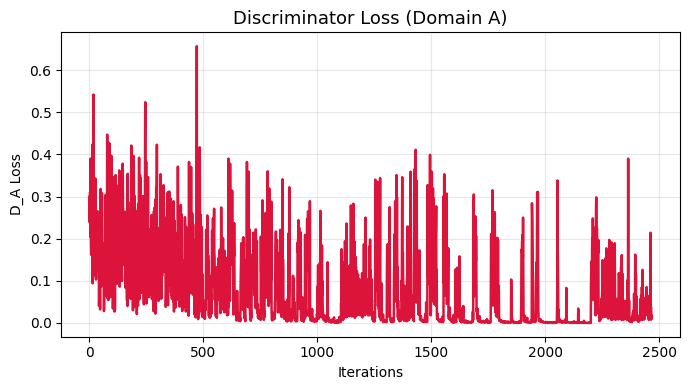

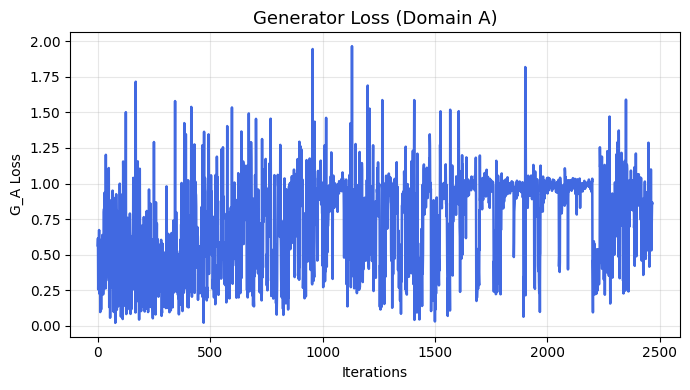

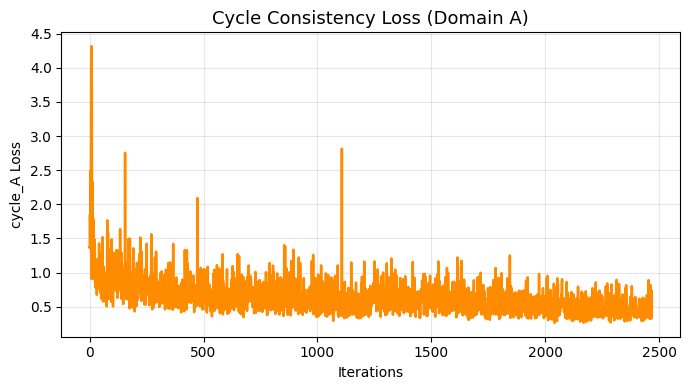

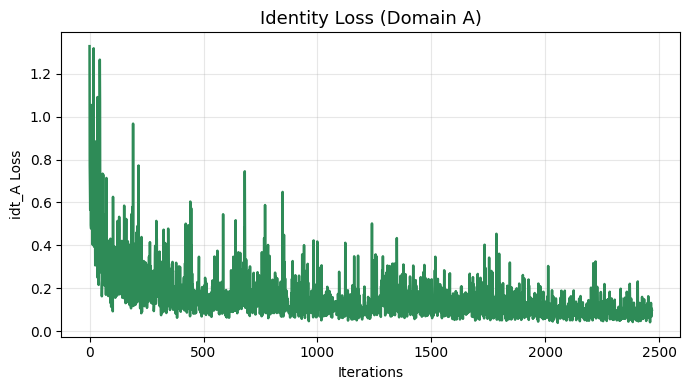

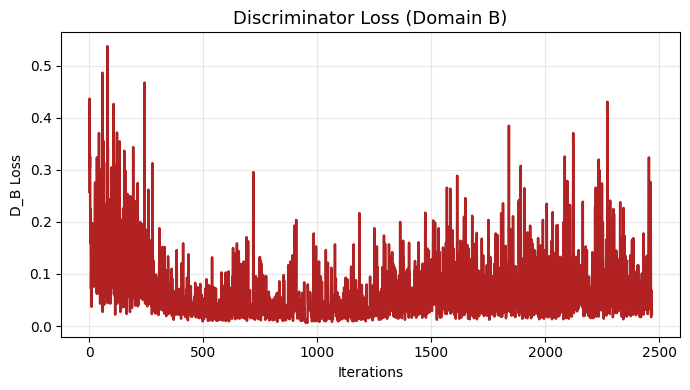

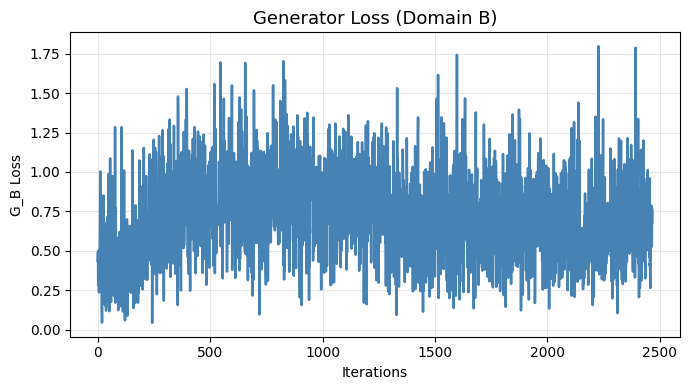

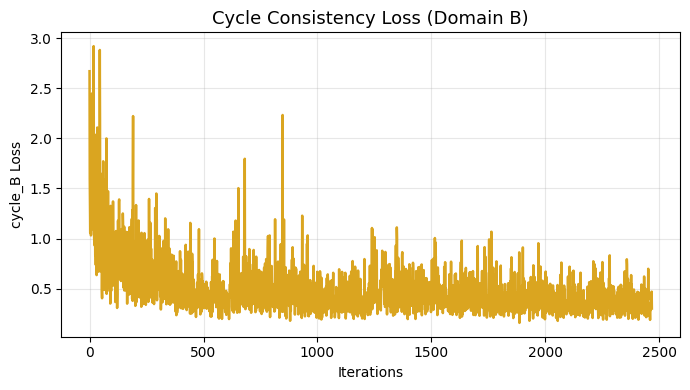

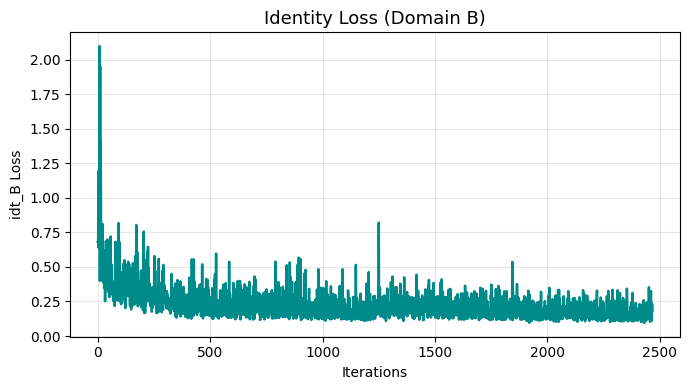

In [5]:
# Helper function for plotting
def plot_loss(y_values, title, ylabel, color='teal'):
    plt.figure(figsize=(7, 4))
    plt.plot(range(len(y_values)), y_values, color=color, linewidth=1.8)
    plt.title(title, fontsize=13)
    plt.xlabel('Iterations')
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Visualize each loss component independently
plot_loss(D_A, 'Discriminator Loss (Domain A)', 'D_A Loss', 'crimson')
plot_loss(G_A, 'Generator Loss (Domain A)', 'G_A Loss', 'royalblue')
plot_loss(cycle_A, 'Cycle Consistency Loss (Domain A)', 'cycle_A Loss', 'darkorange')
plot_loss(idt_A, 'Identity Loss (Domain A)', 'idt_A Loss', 'seagreen')

plot_loss(D_B, 'Discriminator Loss (Domain B)', 'D_B Loss', 'firebrick')
plot_loss(G_B, 'Generator Loss (Domain B)', 'G_B Loss', 'steelblue')
plot_loss(cycle_B, 'Cycle Consistency Loss (Domain B)', 'cycle_B Loss', 'goldenrod')
plot_loss(idt_B, 'Identity Loss (Domain B)', 'idt_B Loss', 'darkcyan')